In [242]:
import pandas as pd
import numpy as np

## Format ratio

In [243]:
# #Load the dataset:
dfs = pd.read_csv('results/master/success_rate.csv', on_bad_lines='warn')



import csv


# with open('results/master/success_rate.csv', newline='', encoding='utf-8') as f:
#     reader = csv.reader(f)
#     rows = list(reader)
#     for row in rows:
#         print(row)




In [244]:
dfs['Success'].value_counts()

Success
True     96
False    57
Name: count, dtype: int64

In [245]:
success = dfs['Success'].value_counts()[True]
fail = dfs['Success'].value_counts()[False]
total = len(dfs)

print(f"Ratio success: {success}/{total}")

Ratio success: 96/153


Random print some of the False.


In [254]:
failed_rows = dfs[dfs['Success'] == False]
sample_dfs = failed_rows.sample(min(10, (max(1,int(total*0.2)))))
for _,row in sample_dfs.iterrows():
    print("------")
    print(row['Comment'])


------
"""
Test session using server name, port and path.

This function tests the creation of a Flask session using the `server_name`, 
`application_root` configuration options. It verifies that the session is 
correctly set with the expected domain, path, and HTTP-only flags in the 
set-cookie header.

Parameters:
    app (Flask application): The Flask application instance.
    client (requests Session): The requests session instance.

Returns:
    None
"""
def test_session_using_server_name_port_and_path(app, client):
------
"""
Raises a RuntimeError indicating that the session is unavailable due to an unconfigured secret key.

Args:
    *args: Variable length argument list.
    **kwargs: Arbitrary keyword arguments.

Returns:
    te.NoReturn: An exception indicating that the function cannot be continued due to an error.
------
"""
Returns the expiration time of a Flask session.

If the session is permanent, returns the current UTC time plus the permanent session lifetime.
Otherwise

## Semantic Score

In [274]:
#Load the dataset:
df = pd.read_csv('results/master/semantic_score.csv')

In [275]:
df.shape

(136, 6)

In [276]:
df = df[~df.duplicated(subset=['Semantic-Score', 'Original-Comment', 'Agent-Comment'], keep='first')]
df.shape

(56, 6)

In [277]:
df.head()

,Semantic-Score,Code,Original-Comment,Agent-Comment,Filename,Agent-Commit
0,0.653213,def get_debug_flag,"""""""Get whether debug mode should be enabled fo...","""""""\nReturns a boolean indicating whether debu...",src/flask/helpers.py,aa4ecf05d33c37d9cc04794f4332b34c94fd6d9e
1,0.593159,def dump,"""""""Serialize data as JSON and write to a file....","""""""\nDumps the provided object to a file strea...",src/flask/json/__init__.py,aa4ecf05d33c37d9cc04794f4332b34c94fd6d9e
2,0.600225,def loads,"""""""Deserialize data as JSON.\n\n If :data:`...","""""""\nLoads JSON data from a string or bytes ob...",src/flask/json/__init__.py,aa4ecf05d33c37d9cc04794f4332b34c94fd6d9e
3,0.691807,def load,"""""""Deserialize data as JSON read from a file.\...","""""""\nLoads JSON data from a file.\n\nThis func...",src/flask/json/__init__.py,aa4ecf05d33c37d9cc04794f4332b34c94fd6d9e
4,0.626986,def response,"""""""Serialize the given arguments as JSON, and ...","""""""\nReturns a response object with the prepar...",src/flask/json/provider.py,aa4ecf05d33c37d9cc04794f4332b34c94fd6d9e


<Axes: >

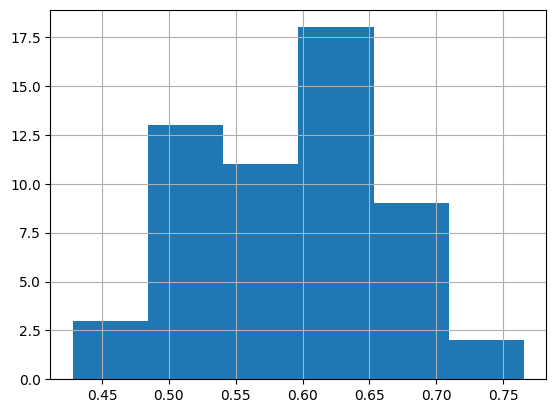

In [279]:
#Draw histogram to see distribution
df['Semantic-Score'].hist(bins=6)

We can see that it follows normal distribution

In [265]:
df['Score-Bin'] = pd.cut(df['Semantic-Score'], bins=6)
# Sample from each bin
n = 0.3
sample_df = df.groupby('Score-Bin', group_keys=False).apply(lambda x: x.sample(n=max(1, int(len(x) * n)), random_state=0))
sample_df = sample_df.reset_index(drop=True)
sample_df['Label'] = ''



DTypePromotionError: The DType <class 'numpy.dtypes._PyFloatDType'> could not be promoted by <class 'numpy.dtypes.StrDType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes._PyFloatDType'>)

In [ ]:
sample_df.shape

(8, 8)

Iterate, and give labels 'L', 'M' or 'H' before continuing 

In [ ]:
sample_df[sample_df['Label'] == ''][['Semantic-Score','Original-Comment', 'Agent-Comment', 'Label']]

,Semantic-Score,Original-Comment,Agent-Comment,Label
0,0.434890,"""""""The Jinja environment used to load template...","""""""\nReturns an instance of Jinja2's Environme...",
1,0.512154,"""""""Reload templates when they are changed. Use...","""""""\nReturns the value of `TEMPLATES_AUTO_RELO...",
2,0.579308,"""""""Determine if the given string is an IP addr...","""""""\nChecks if the provided string is a valid ...",
3,0.599835,"""""""Enable this to use the ``X-Sendfile`` featu...","""""""\nDeprecation Notice:\n\nThe `use_x_sendfil...",
4,0.612413,"""""""Dispatches the request and on top of that p...","""""""\nDispatches the full request, including ru...",
5,0.606191,"""""""This attribute is set to ``True`` if the ap...","""""""\nDeprecation Notice: `got_first_request` i...",
6,0.646095,"""""""The JSON encoder class to use. Defaults to\...","""""""\nDeprecation Warning: `json_encoder` is de...",
7,0.737521,"""""""The name of the cookie set by the session i...","""""""\nReturns the name of the session cookie.\n...",


In [ ]:
n = 1

print("""-- LABEL --""")
print(sample_df.iloc[n]["Label"])
print("""-- Original Comment --""")
print(sample_df.iloc[n]["Original-Comment"])
print("""-- Agent Comment --""")
print(sample_df.iloc[n]["Agent-Comment"])

-- LABEL --
L
-- Original Comment --
"""Reload templates when they are changed. Used by
        :meth:`create_jinja_environment`. It is enabled by default in debug mode.

        .. deprecated:: 2.2
            Will be removed in Flask 2.3. Use ``app.config["TEMPLATES_AUTO_RELOAD"]``
            instead.

        .. versionadded:: 1.0
            This property was added but the underlying config and behavior
            already existed.
        """
-- Agent Comment --
"""
Returns the value of `TEMPLATES_AUTO_RELOAD` from the application configuration.

If `TEMPLATES_AUTO_RELOAD` is set, its value is returned. Otherwise, the value of `debug` is used as a fallback.

Deprecated since Flask 2.3 in favor of using `TEMPLATES_AUTO_RELOAD` in `app.config`.

Args:
    None

Returns:
    bool: The value of `TEMPLATES_AUTO_RELOAD` or `debug` if not set.
"""


In [ ]:
sample_df.iloc[7,7] = "H"

NOW WE HAVE LABELED ALL THE SAMPLE

In [ ]:
summary = sample_df.groupby('Label')['Semantic-Score'].agg(
    Mean='mean',
    Std_Dev='std',
    Min='min',
    Q1=lambda x: x.quantile(0.25),
    Median='median',
    Q3=lambda x: x.quantile(0.75),
    Max='max'
).reset_index()
summary

,Label,Mean,Std_Dev,Min,Q1,Median,Q3,Max
0,H,0.671856,0.092864,0.606191,0.639024,0.671856,0.704689,0.737521
1,L,0.515626,0.082527,0.434890,0.473522,0.512154,0.555994,0.599835
2,M,0.612605,0.033394,0.579308,0.595860,0.612413,0.629254,0.646095


In [ ]:
# Get Q3 of L and Q1 of M
l_q3 = summary.loc[summary['Label'] == 'L', 'Q3'].values[0]
m_q1 = summary.loc[summary['Label'] == 'M', 'Q1'].values[0]
threshold_L_M = (l_q3 + m_q1) / 2

# Get Q3 of M and Q1 of H
m_q3 = summary.loc[summary['Label'] == 'M', 'Q3'].values[0]
h_q1 = summary.loc[summary['Label'] == 'H', 'Q1'].values[0]
threshold_M_H = (m_q3 + h_q1) / 2

# Show results
print("Threshold between L and M:", round(threshold_L_M, 3))
print("Threshold between M and H:", round(threshold_M_H, 3))

Threshold between L and M: 0.576
Threshold between M and H: 0.634
